<a href="https://colab.research.google.com/github/vietdoo/ML_Notebook/blob/main/Logistic%20Regression%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


download dataset meo

In [ ]:
!wget -O test_cat.h5 https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5
!wget -O train_cat.h5 https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/train_catvnoncat.h5

--2021-08-22 07:12:28--  https://github.com/rvarun7777/Deep_Learning/raw/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rvarun7777/Deep_Learning/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5 [following]
--2021-08-22 07:12:28--  https://raw.githubusercontent.com/rvarun7777/Deep_Learning/master/Neural%20Networks%20and%20Deep%20Learning/Week%202/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercon

read dataset

In [ ]:
train_dataset = h5py.File('train_cat.h5', "r")
test_dataset = h5py.File('test_cat.h5', "r")

In [ ]:
train_x = np.array(train_dataset["train_set_x"][:])
train_y = np.array(train_dataset["train_set_y"][:])
test_x = np.array(test_dataset["test_set_x"][:])
test_y = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

y = [1] => cat


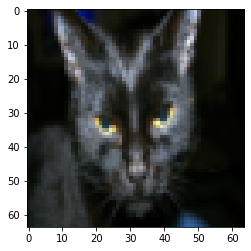

In [ ]:
plt.imshow(train_x[25])
print("y = " + str(train_y[:, 25]) + " => " + classes[np.squeeze(train_y[:, 25])].decode("utf-8"))

In [ ]:
m_train = train_x.shape[0] # so anh train
m_test = test_x.shape[0]  #test
px = train_x.shape[1]  #so px theo chieu ngang/doc (hinh vuong) => px * px * 3 (rgb)
print("Img size: ", px, px, 3)

Img size:  64 64 3


In [ ]:
train_x_ft = train_x.reshape(train_x.shape[0], -1).T 
#lay shape[0] lam chieu 0, tat con lai * voi nhau => chieu 1
#sau do chuyen vi => 
test_x_ft = test_x.reshape(test_x.shape[0], -1).T

In [ ]:
train_x_set = train_x_ft/255.
test_x_set = test_x_ft/255.
#chia 255. => range(0..1)

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))
#test ham

sigmoid([0, 2]) = [0.5        0.88079708]


In [ ]:
def init_zeros(n):
  w = np.zeros((n, 1))
  b = 0
  return w, b

In [ ]:
def propagate(w, b, X, Y):
  m = X.shape[1]
  A = sigmoid(np.dot(w.T, X) + b)
  cost = -1./m*np.sum(Y*np.log(A) + (1 - Y)*np.log(1 - A))

  dw = 1./m*np.dot(X, (A - Y).T)
  db = 1./m*np.sum(A - Y)

  grads = {"dw": dw,
           "db": db}
  return grads, cost

In [ ]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print("dw: ", grads["dw"])
print("db: ", grads["db"])
print("cost: ", cost)

dw:  [[0.99993216]
 [1.99980262]]
db:  0.49993523062470574
cost:  6.000064773192205


In [ ]:
def optimize(w, b, X, Y, repeat, learning_rate, print_cost = False):
  costs = []

  for i in range(repeat):
    grads, cost = propagate(w, b, X, Y)

    dw = grads["dw"]
    db = grads["db"]
    
    w = w - learning_rate * dw
    b = b - learning_rate * db
    if i % 100 == 0:
      costs.append(cost)
    if (print_cost and i % 100 == 0):
      print(i, "train - cost: ",cost)
  
  params = {"w": w,
            "b": b}
  
  grads = {"dw": dw,
           "db": db}

  return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, repeat = 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

0 train - cost:  6.000064773192205
w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [ ]:
def predict(w, b, X):
  m = X.shape[1]
  Y_predict =  np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T, X) + b)

  for i in range(A.shape[1]):
    if (A[0, i] > 0.5):
      Y_predict[0, i] = 1
    else:
      Y_predict[0, i] = 0
  return Y_predict

In [ ]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [ ]:
def model(x_train, y_train, x_test, y_test, repeat = 2000, learning_rate = 0.5, print_cost = False):

  w, b = init_zeros(x_train.shape[0])
  parameters, grads, costs = optimize(w, b, x_train, y_train, repeat, learning_rate, print_cost=print_cost)

  w = parameters["w"]
  b = parameters["b"]

  yhat_test = predict(w, b, x_test)
  yhat_train = predict(w, b, x_train)

  print("Train accuracy: {} %".format(100 - 100*np.mean(np.abs(yhat_train - y_train))))
  print("Test accuracy: {} %".format(100 - 100*np.mean(np.abs(yhat_test - y_test))))
  d = {"costs": costs,
         "yhat_test": yhat_test, 
         "yhat_train" : yhat_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "repeat": repeat}
  return d

In [ ]:
d = model(train_x_set, train_y, test_x_set, test_y, 2000, 0.004, True)

0 train - cost:  0.6931471805599453
100 train - cost:  0.5067645883831419
200 train - cost:  0.4422689212945626
300 train - cost:  0.39720105682274426
400 train - cost:  0.3624394101236163
500 train - cost:  0.3342713507722279
600 train - cost:  0.3107252756897317
700 train - cost:  0.29060824036293925
800 train - cost:  0.273137693114055
900 train - cost:  0.2577705277181775
1000 train - cost:  0.24411364620607814
1100 train - cost:  0.23187308366991685
1200 train - cost:  0.22082318168476647
1300 train - cost:  0.21078695342839807
1400 train - cost:  0.2016230599681651
1500 train - cost:  0.19321687776354446
1600 train - cost:  0.18547419845031674
1700 train - cost:  0.17831667895611145
1800 train - cost:  0.17167848863214222
1900 train - cost:  0.16550379492171552
Train accuracy: 98.08612440191388 %
Test accuracy: 70.0 %


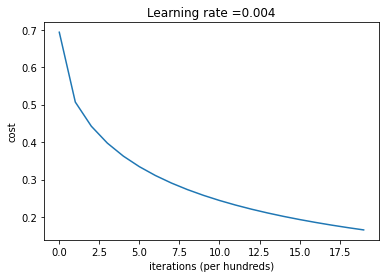

array([0.69314718, 0.50676459, 0.44226892, 0.39720106, 0.36243941,
       0.33427135, 0.31072528, 0.29060824, 0.27313769, 0.25777053,
       0.24411365, 0.23187308, 0.22082318, 0.21078695, 0.20162306,
       0.19321688, 0.1854742 , 0.17831668, 0.17167849, 0.16550379])

In [ ]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
costs